# Linear Regression

In [2]:
library(UsingR)

In [3]:
data(diamond)

In [5]:
head(diamond)

carat,price
0.17,355
0.16,328
0.17,350
0.18,325
0.25,642
0.16,342


In [6]:
library(ggplot2)

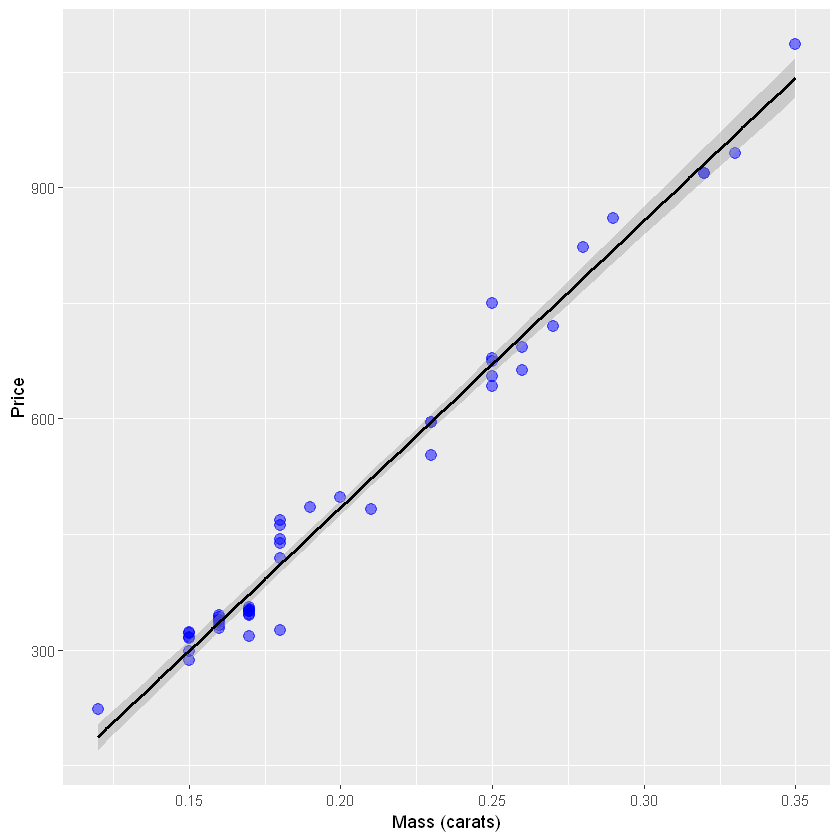

In [12]:
g = ggplot(diamond, aes(x = carat, y = price))
g = g + xlab("Mass (carats)")
g = g + ylab("Price")
g = g + geom_point(size = 3, color = 'blue', alpha = 0.5)
g = g + geom_smooth(method = "lm", color = "black")
g

In [30]:
fit <- lm(price ~ carat, data = diamond)
fit


Call:
lm(formula = price ~ carat, data = diamond)

Coefficients:
(Intercept)        carat  
     -259.6       3721.0  


In [31]:
coef(fit)[1]

(Intercept) 
  -259.6259

In [32]:
coef(fit)[2]

carat 
3721.025

In [62]:
y <- coef(fit)[2] * c(0.25, 0.37, 0.89) + coef(fit)[1]
y

[1]  670.6303 1117.1533 3052.0862

In [61]:
predict(fit, newdata = data.frame(carat = c(0.25, 0.37, 0.89)))

1         2         3 
 670.6303 1117.1533 3052.0862

In [127]:
summary(fit)$r.squared

[1] 0.9782608

### Plot this data on the graph itself

## Residuals

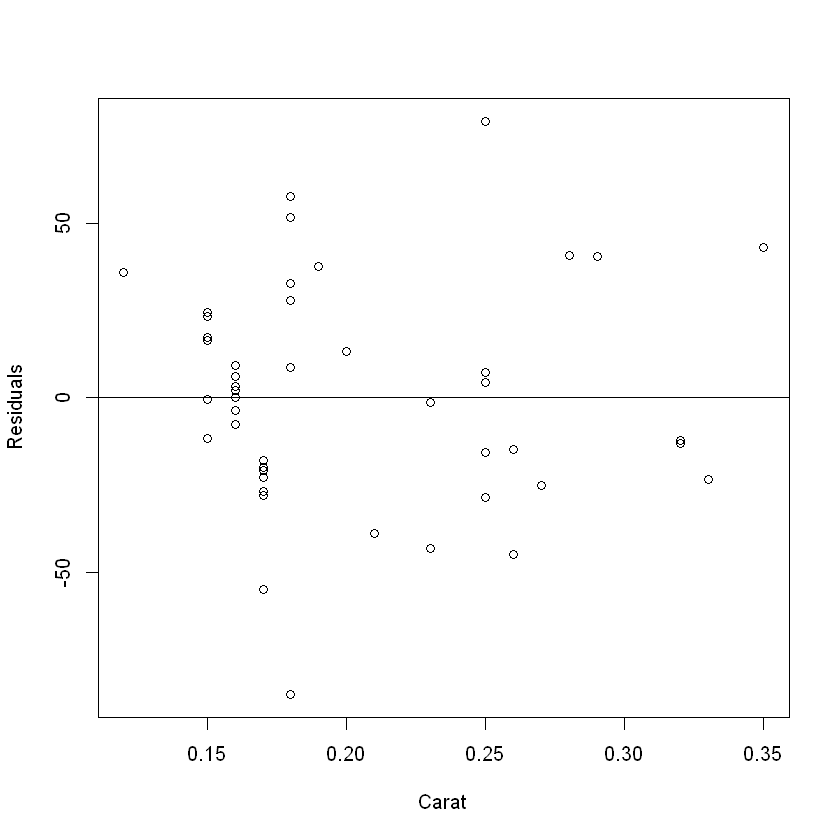

In [68]:
plot(diamond$carat, resid(fit), ylab = "Residuals", xlab = "Carat")
abline(0, 0)

In [76]:
sum_coef <- summary(fit)$coefficient
sum_coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-259.6259,17.31886,-14.99094,2.523271e-19
carat,3721.0249,81.78588,45.49715,6.751260e-40


In [89]:
(sum_coef[2,1] + c(-1,1) * qt(0.975, df = fit$df) * sum_coef[2,2])/10

[1] 355.6398 388.5651

## Draw Ribbon Chart

## Mulitple (Multivariable) Linear Regression

In [151]:
data(mtcars)

In [152]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [153]:
input <- mtcars[, c("mpg", "disp", "hp", "wt")]
head(input)

,mpg,disp,hp,wt
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [154]:
summary(lm(mpg ~ disp, data = input))$r.squared

[1] 0.7183433

In [155]:
summary(lm(mpg ~ hp, data = input))$r.squared

[1] 0.6024373

In [156]:
summary(lm(mpg ~ wt, data = input))$r.squared

[1] 0.7528328

In [157]:
model <- lm(mpg ~ disp + hp + wt, data = input)
model


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  


In [166]:
summary(model)$r.squared

[1] 0.8268361

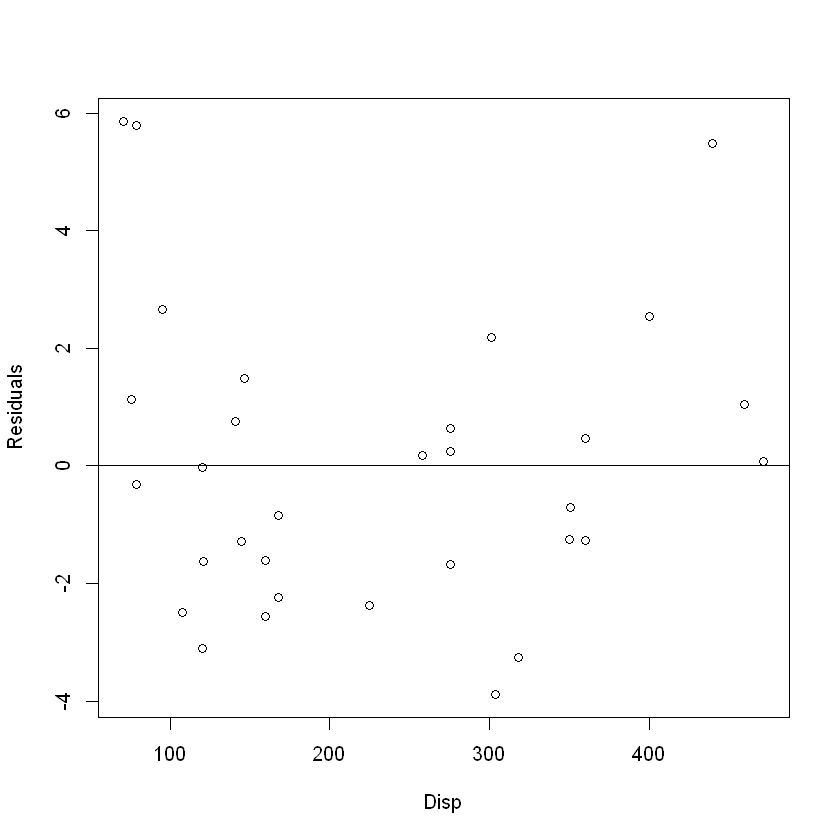

In [163]:
plot(mtcars$disp, resid(model), ylab = "Residuals", xlab = "Disp")
abline(0, 0)

## ANOVA

In [113]:
model1 <- lm(mpg ~ disp, data = input)
model2 <- lm(mpg ~ disp + hp, data = input)
model3 <- lm(mpg ~ disp + hp + wt, data = input)
anova(model1, model2, model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
30,317.1587,NA,NA,NA,NA
29,283.4934,1,33.66525,4.834216,0.036328627
28,194.9907,1,88.50276,12.708696,0.001330991


In [123]:
input <- mtcars[, c("mpg", "disp", "hp", "wt", "cyl")]
head(input)

,mpg,disp,hp,wt,cyl
Mazda RX4,21.0,160,110,2.620,6
Mazda RX4 Wag,21.0,160,110,2.875,6
Datsun 710,22.8,108,93,2.320,4
Hornet 4 Drive,21.4,258,110,3.215,6
Hornet Sportabout,18.7,360,175,3.440,8
Valiant,18.1,225,105,3.460,6


In [125]:
summary(lm(mpg ~ disp + hp + wt + cyl, data = input))$r.squared

[1] 0.8486348

In [126]:
model1 <- lm(mpg ~ disp + hp + wt, data = input)
model2 <- lm(mpg ~ disp + hp + wt + cyl, data = input)
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
28,194.9907,NA,NA,NA,NA
27,170.4444,1,24.54631,3.888368,0.05894681


## Polynomial Regression

In [128]:
head(diamond)

carat,price
0.17,355
0.16,328
0.17,350
0.18,325
0.25,642
0.16,342


In [141]:
poly_fit <- lm(price ~ poly(carat, 3, raw = TRUE), data = diamond)
coef(poly_fit)
summary(poly_fit)$r.squared

(Intercept) poly(carat, 3, raw = TRUE)1 
                   1.856795                  490.114305 
poly(carat, 3, raw = TRUE)2 poly(carat, 3, raw = TRUE)3 
               12438.573668               -15044.759619

[1] 0.9791144

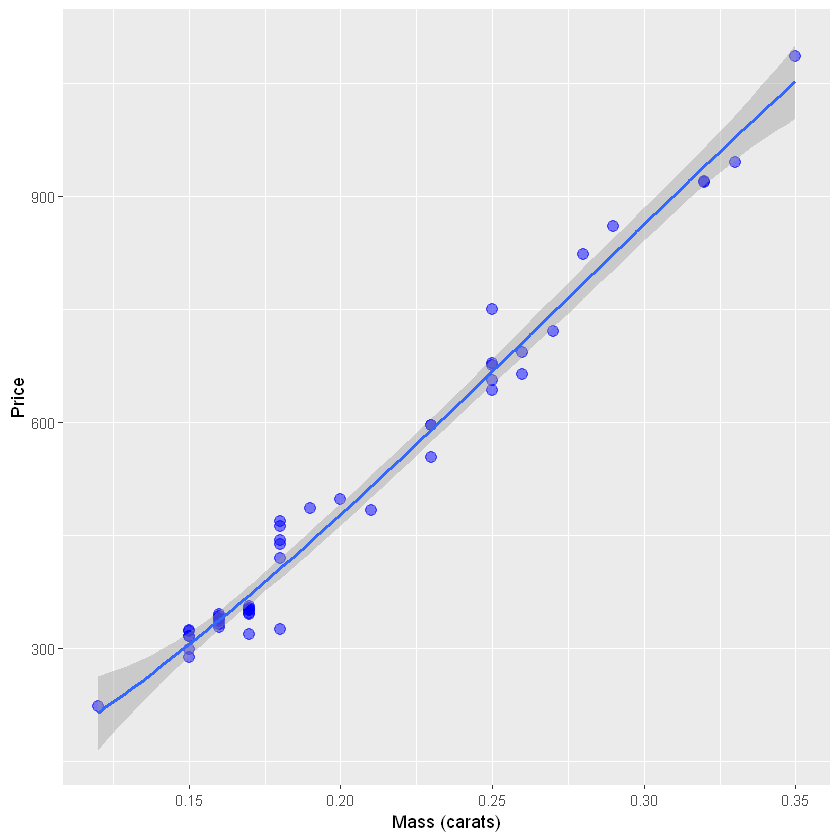

In [149]:
x <- diamond$carat
y <- diamond$price
g = ggplot(diamond, aes(x = carat, y = price))
g = g + xlab("Mass (carats)")
g = g + ylab("Price")
g = g + geom_point(size = 3, color = 'blue', alpha = 0.5)
g = g + stat_smooth(method = lm, formula = y ~ poly(x, 3, raw = TRUE))
g

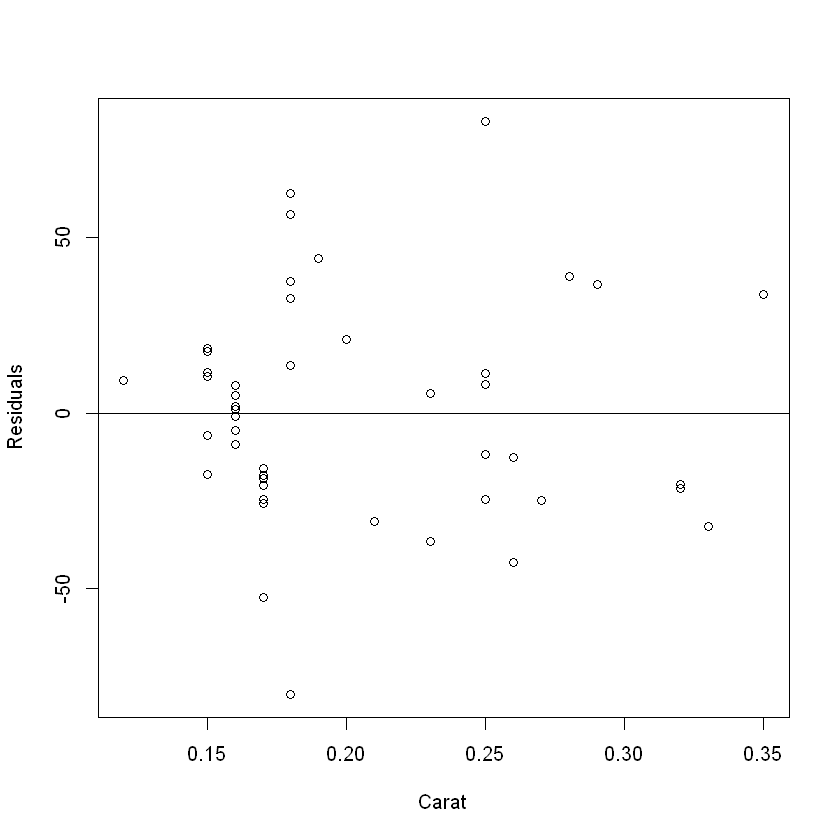

In [150]:
plot(diamond$carat, resid(poly_fit), ylab = "Residuals", xlab = "Carat")
abline(0, 0)

In [164]:
input <- mtcars[, c("mpg", "disp", "hp", "wt")]
head(input)

,mpg,disp,hp,wt
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


## Multiple Polynomial Regression

In [168]:
m_poly_fit <- lm(mpg ~ poly(disp, 3, raw = TRUE) + poly(hp, 3, raw = TRUE) + poly(wt, 3, raw = TRUE), data = mtcars)
summary(m_poly_fit)$r.squared

[1] 0.9172112

# Logistic Regression

In [169]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [170]:
input <- mtcars[, c("am", "cyl", "hp", "wt")]
head(input)

,am,cyl,hp,wt
Mazda RX4,1,6,110,2.620
Mazda RX4 Wag,1,6,110,2.875
Datsun 710,1,4,93,2.320
Hornet 4 Drive,0,6,110,3.215
Hornet Sportabout,0,8,175,3.440
Valiant,0,6,105,3.460


In [172]:
model <- glm(formula = am ~ cyl + hp + wt, data = input, family = "binomial")
model


Call:  glm(formula = am ~ cyl + hp + wt, family = "binomial", data = input)

Coefficients:
(Intercept)          cyl           hp           wt  
   19.70288      0.48760      0.03259     -9.14947  

Degrees of Freedom: 31 Total (i.e. Null);  28 Residual
Null Deviance:	    43.23 
Residual Deviance: 9.841 	AIC: 17.84

In [173]:
summary(model)


Call:
glm(formula = am ~ cyl + hp + wt, family = "binomial", data = input)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.17272  -0.14907  -0.01464   0.14116   1.27641  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8


In [190]:
input[17,-1]
prob <- predict(model, newdata = input[17,-1], type="response")
ifelse(prob > 0.5, 1, 0)

,cyl,hp,wt
Chrysler Imperial,8,230,5.345


Chrysler Imperial 
                0

In [191]:
input[27, -1]
prob <- predict(model, newdata = input[27, -1], type="response")
ifelse(prob > 0.5, 1, 0)

,cyl,hp,wt
Porsche 914-2,4,91,2.14


Porsche 914-2 
            1

In [194]:
d = data.frame(cyl = 9, hp = 300, wt = 7)
prob <- predict(model, newdata = d, type="response")
ifelse(prob > 0.5, 1, 0)

1 
0

## Practice Dataset

In [195]:
data(Seatbelts)

In [196]:
seat_belts <- as.data.frame(Seatbelts)

In [197]:
head(seat_belts)

DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
107,1687,867,269,9059,0.1029718,12,0
97,1508,825,265,7685,0.1023630,6,0
102,1507,806,319,9963,0.1020625,12,0
87,1385,814,407,10955,0.1008733,8,0
119,1632,991,454,11823,0.1010197,10,0
106,1511,945,427,12391,0.1005812,13,0
